<a href="https://colab.research.google.com/github/Ramya810/CODSOFT/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITLE: TITANIC SURVIVAL PREDICTION

# importing libraries

In [ ]:
import pandas as pd
import numpy as np

# loading data

In [ ]:
data=pd.read_csv("/content/archive (3).zip")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
titanic = data.dropna()

titanic = pd.get_dummies(titanic,columns=['Sex','Embarked'],drop_first=True)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# test and train data

In [ ]:
#splittind data into testing and training

from sklearn.model_selection import train_test_split

x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

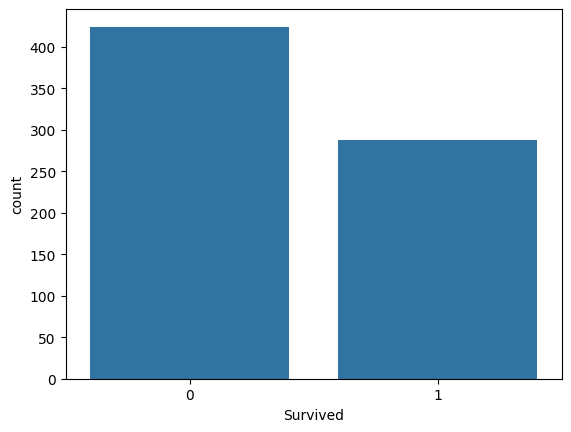

In [ ]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x= 'Survived',data= titanic)
plt.show()

# pclass and survived

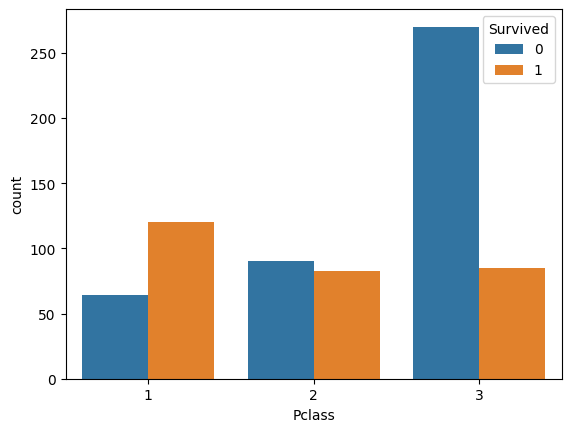

In [ ]:
#realtionship between pclass and survived
sns.countplot(x='Pclass', hue ='Survived', data = titanic)
plt.show()

# distribution of age

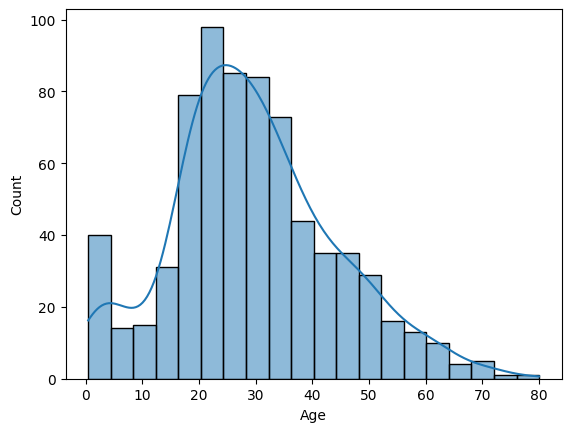

In [ ]:
#distribution of age
sns.histplot(titanic['Age'].dropna(),kde=True)
plt.show()

# correlation between numeric var

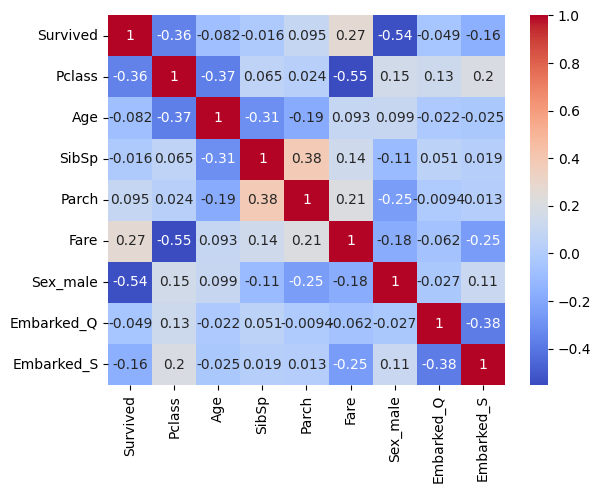

In [ ]:
corr_matrix=titanic.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.show()

# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# MODEL

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.7622377622377622
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80        80
           1       0.75      0.68      0.72        63

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.76      0.76      0.76       143



# confusion matrix

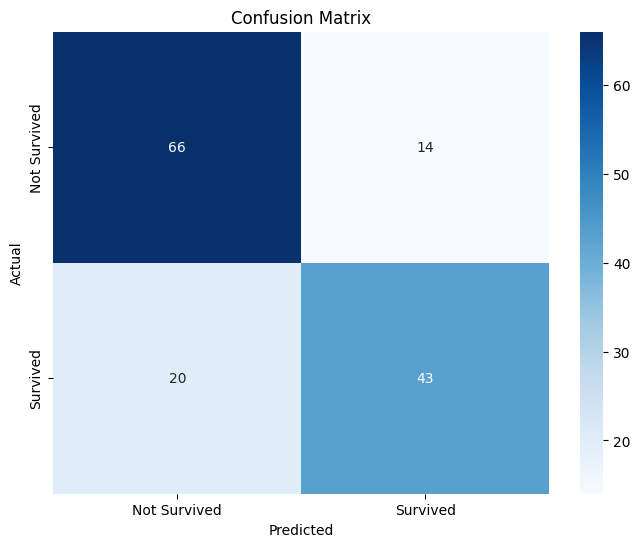

In [ ]:
from sklearn.metrics import confusion_matrix

# code refer to confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)

#code plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(con_matrix, annot=True, fmt='d' , cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()